In [6]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [7]:
anime_df = pd.read_csv('anime.csv')
rating_df = pd.read_csv('rating.csv')
rating_df = rating_df[rating_df['rating'] != -1]  # Remove -1 ratings (unknown)
rating_df = rating_df.drop_duplicates(['user_id', 'anime_id'])  # Remove duplicate ratings

# EDA

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


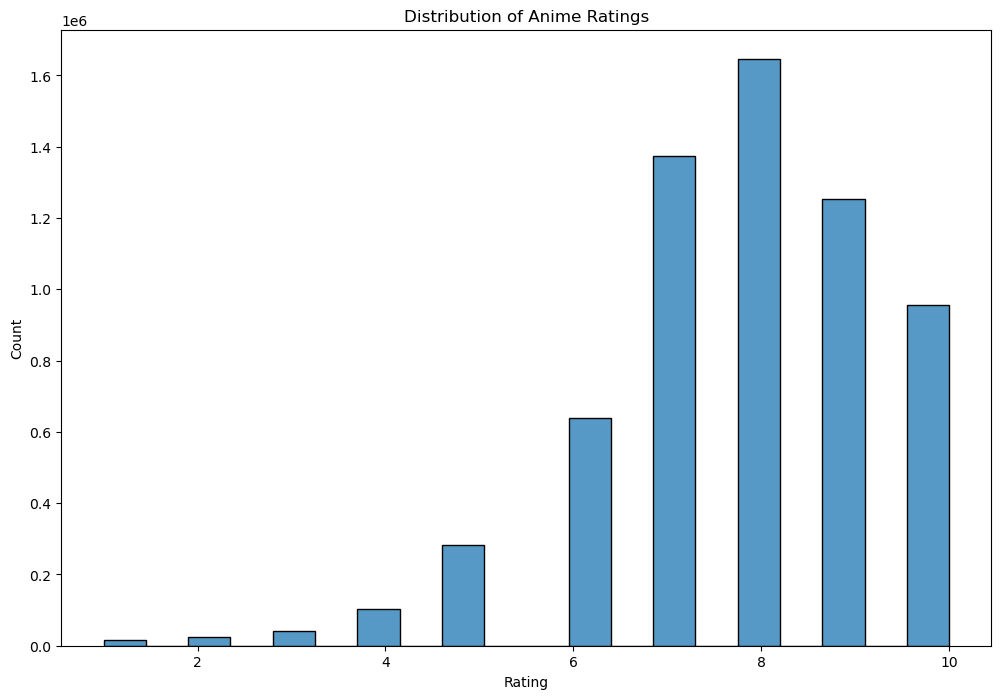


Rating Statistics:
count    6.337234e+06
mean     7.808497e+00
std      1.572496e+00
min      1.000000e+00
25%      7.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

User Engagement Statistics:
Average ratings per user: 91.05
Median ratings per user: 45.00
Most active user rated: 3747 anime

Most Rated Anime IDs:
anime_id
1535     34226
11757    26309
16498    25289
1575     24125
6547     23565
dtype: int64


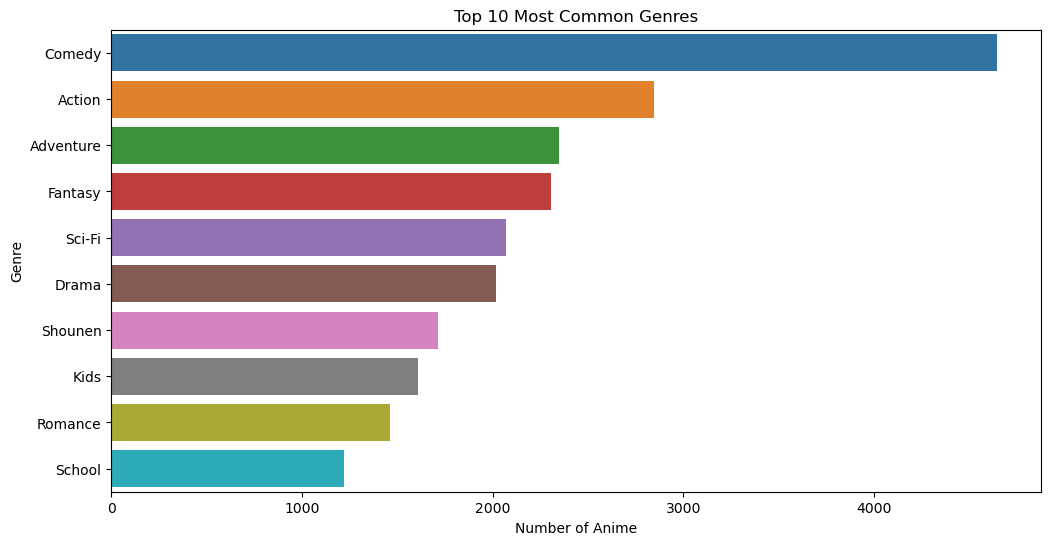

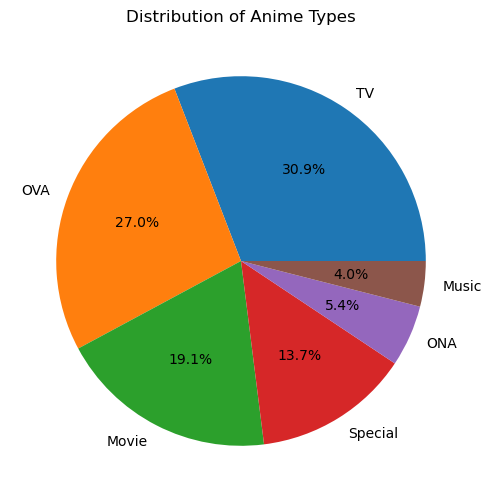


Dataset Overview:
Total number of anime: 12,294
Total number of users: 69,600
Total number of ratings: 6,337,234

Top 5 Highest Rated Anime:
                                          name  rating
10464  Taka no Tsume 8: Yoshida-kun no X-Files   10.00
10400              Spoon-hime no Swing Kitchen    9.60
9595                          Mogura no Motoro    9.50
0                               Kimi no Na wa.    9.37
9078                              Kahei no Umi    9.33


In [8]:


# First plot: Distribution of Ratings
plt.figure(figsize=(12, 8))
sns.histplot(data=rating_df, x='rating', bins=20)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Basic statistics
print("\nRating Statistics:")
print(rating_df['rating'].describe())

# User engagement statistics
user_ratings_count = rating_df.groupby('user_id').size()
print("\nUser Engagement Statistics:")
print(f"Average ratings per user: {user_ratings_count.mean():.2f}")
print(f"Median ratings per user: {user_ratings_count.median():.2f}")
print(f"Most active user rated: {user_ratings_count.max()} anime")

# Anime popularity
anime_popularity = rating_df.groupby('anime_id').size().sort_values(ascending=False)
print("\nMost Rated Anime IDs:")
print(anime_popularity.head())

# If genre column exists
if 'genre' in anime_df.columns:
    # Genre analysis
    genres = [genre for genres in anime_df['genre'].dropna() for genre in genres.split(',')]
    genres = [genre.strip() for genre in genres]
    genre_counts = pd.DataFrame(Counter(genres).most_common(10), 
                              columns=['Genre', 'Count'])
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=genre_counts, x='Count', y='Genre')
    plt.title('Top 10 Most Common Genres')
    plt.xlabel('Number of Anime')
    plt.show()

# If type column exists
if 'type' in anime_df.columns:
    plt.figure(figsize=(12, 6))
    anime_types = anime_df['type'].value_counts()
    plt.pie(anime_types.values, labels=anime_types.index, autopct='%1.1f%%')
    plt.title('Distribution of Anime Types')
    plt.show()

# Print basic dataset information
print("\nDataset Overview:")
print(f"Total number of anime: {len(anime_df):,}")
print(f"Total number of users: {rating_df['user_id'].nunique():,}")
print(f"Total number of ratings: {len(rating_df):,}")

# If rating column exists in anime_df
if 'rating' in anime_df.columns:
    print("\nTop 5 Highest Rated Anime:")
    print(anime_df.nlargest(5, 'rating')[['name', 'rating']])


Detailed Genre Statistics:
Genre                Avg Rating   # of Anime    Std Dev
--------------------------------------------------------------------------------
Josei                      7.44           52       0.77
Thriller                   7.38           86       1.09
Mystery                    7.23          485       0.84
Police                     7.12          195       0.81
Shounen                    7.06         1684       0.83
Psychological              7.01          226       1.13
Military                   7.00          416       0.87
Supernatural               7.00         1001       0.91
Romance                    7.00         1437       0.79
Shoujo Ai                  6.98           54       0.71


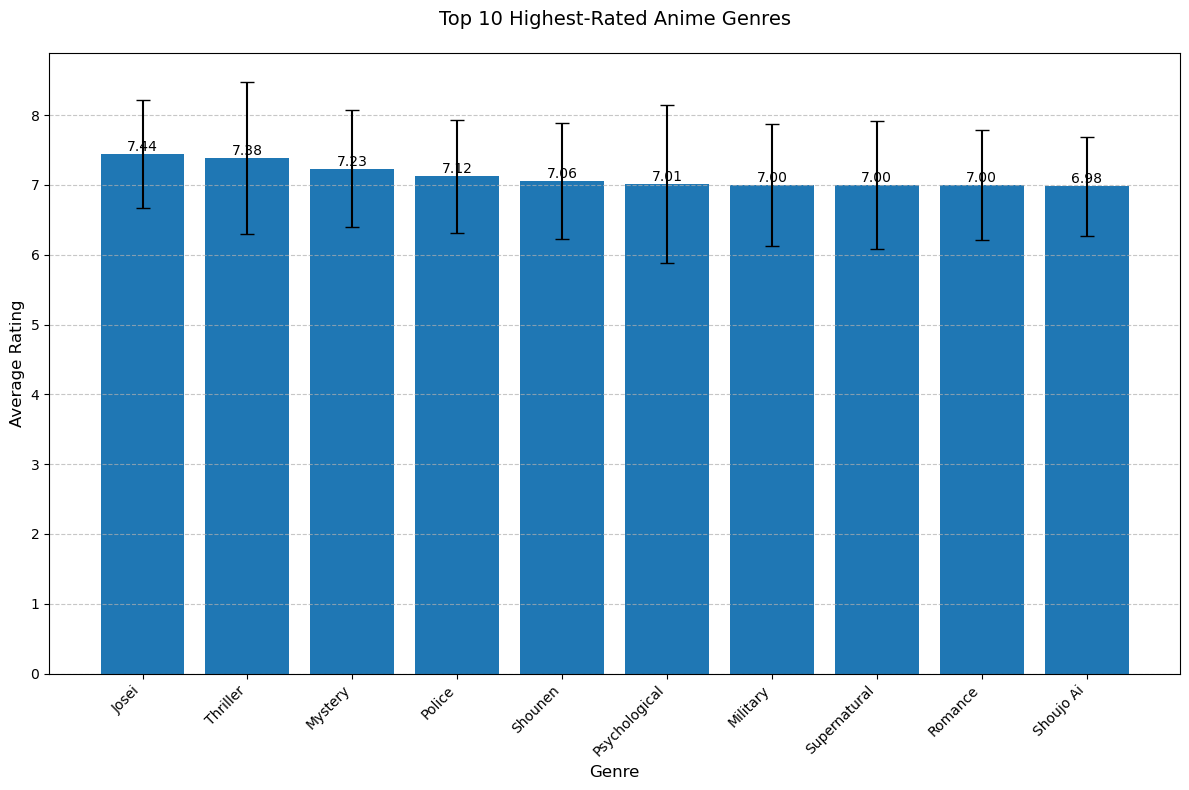

In [9]:
def analyze_genre_ratings(anime_df):
    genre_ratings = []
    for _, row in anime_df.iterrows():
        if isinstance(row['genre'], str):
            genres = row['genre'].split(',')
            for genre in genres:
                genre = genre.strip()  
                genre_ratings.append((genre, row['rating']))
    
    genre_df = pd.DataFrame(genre_ratings, columns=['genre', 'rating'])
    
    genre_stats = genre_df.groupby('genre').agg({
        'rating': ['mean', 'count', 'std']
    }).reset_index()
    
    genre_stats.columns = ['genre', 'avg_rating', 'count', 'std']
    
    genre_stats = genre_stats[genre_stats['count'] >= 10]
    
    return genre_stats.sort_values('avg_rating', ascending=False).head(10)

top_genres = analyze_genre_ratings(anime_df)

plt.figure(figsize=(12, 8))
bars = plt.bar(
    range(len(top_genres)), 
    top_genres['avg_rating'],
    yerr=top_genres['std'],
    capsize=5
)

plt.title('Top 10 Highest-Rated Anime Genres', fontsize=14, pad=20)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(range(len(top_genres)), top_genres['genre'], rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., 
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()

print("\nDetailed Genre Statistics:")
print("=" * 80)
print(f"{'Genre':<20} {'Avg Rating':>10} {'# of Anime':>12} {'Std Dev':>10}")
print("-" * 80)
for _, row in top_genres.iterrows():
    print(f"{row['genre']:<20} {row['avg_rating']:>10.2f} {row['count']:>12.0f} {row['std']:>10.2f}")

plt.show()